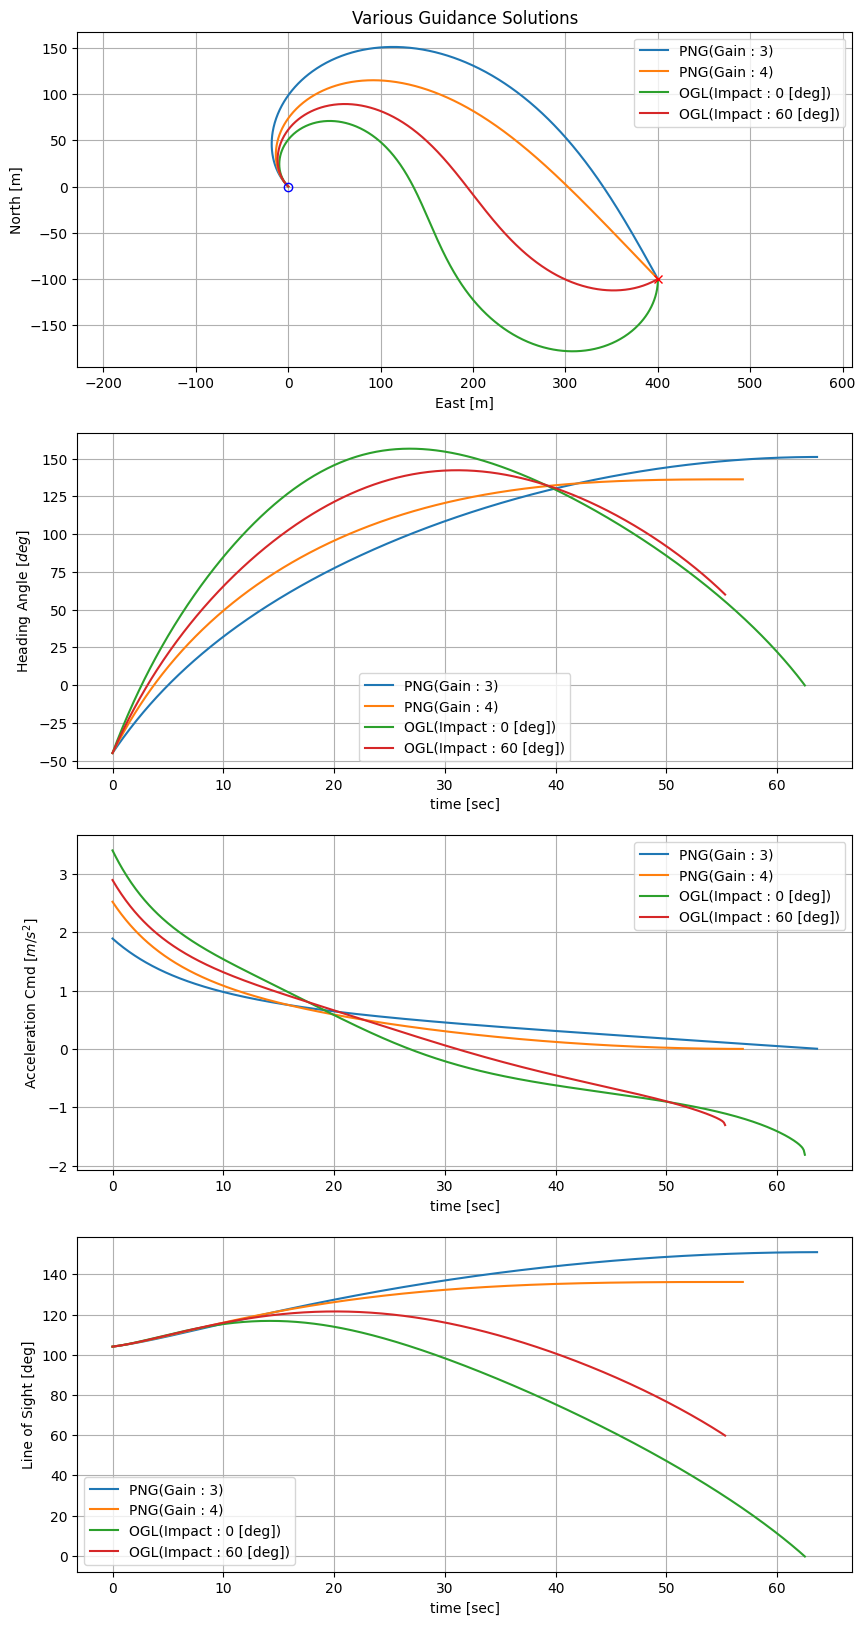

In [2]:
import numpy as np
import matplotlib.pyplot as plt

##### Guidance Solutions of Nonlinear Dynamical System #####

# Nonlinear Dynamical Equations
def state_dot(t, x, V, u):
  pos_N, pos_E, chi = x
  pos_N_dot = V*np.cos(chi)
  pos_E_dot = V*np.sin(chi)
  chi_dot = u/V
  return np.array([pos_N_dot, pos_E_dot, chi_dot])

# Simulation Settings
tf = 1e3
dt = 1e-1
V = 10
x_init = [0, 0, -45*np.pi/180]  # [Pos_N, Pos_E, Heading]
tgt_pos = [-100, 400]           # [Pos_N, Pos_E]
Impact_Ang = 60*np.pi/180

# Loop for Various Guidance Solutions
for m in range(0, 4):
  # Setting Variables
  n = int(tf/dt) + 1
  t = np.linspace(0, tf, n)
  u = np.zeros([1, n])
  x = np.zeros([3, n])
  LOS = np.zeros([1, n])
  dist = np.zeros([1, n])
  x[:, 0] = x_init

  # Simulation Begins
  for i in range(0, n):
    rgo = np.linalg.norm(x[0 : 2, i] - tgt_pos)
    tgo = rgo/V
    LOS[0, i] = np.arctan2(tgt_pos[1] - x[1, i], tgt_pos[0] - x[0, i])
    dist[0, i] = np.linalg.norm(x[0 : 2, i] - tgt_pos)

    # Guidance Solutions
    if m == 0:
      # PNG, Gain : 3
      u[0, i] = V/tgo*3*(LOS[0, i] - x[2, i])
    elif m == 1:
      # PNG, Gain : 4
      u[0, i] = V/tgo*4*(LOS[0, i] - x[2, i])
    elif m == 2:
      # OGL, Impact angle : 0
      u[0, i] = V/tgo*(6*LOS[0, i] - 4*x[2, i])
    elif m == 3:
      # OGL, Impact angle : 60
      u[0, i] = V/tgo*(6*LOS[0, i] - 4*x[2, i] - 2*Impact_Ang)

    # State Derivatives
    x_dot = state_dot(t[i], x[:, i], V, u[0, i])

    # Terminating Simulation
    if tgo < dt:
      if m == 0:
        t_PNG3 = t[0 : i]
        x_PNG3 = x[:, 0 : i]
        u_PNG3 = u[0, 0 : i]
        LOS_PNG3 = LOS[0, 0 : i]
        Dist_PNG3 = dist[0, 0 : i]
      elif m == 1:
        t_PNG4 = t[0 : i]
        x_PNG4 = x[:, 0 : i]
        u_PNG4 = u[0, 0 : i]
        LOS_PNG4 = LOS[0, 0 : i]
        Dist_PNG4 = dist[0, 0 : i]
      elif m == 2:
        t_OGL_1 = t[0 : i]
        x_OGL_1 = x[:, 0 : i]
        u_OGL_1 = u[0, 0 : i]
        LOS_OGL_1 = LOS[0, 0 : i]
        Dist_OGL_1 = dist[0, 0 : i]
      elif m == 3:
        t_OGL_2 = t[0 : i]
        x_OGL_2 = x[:, 0 : i]
        u_OGL_2 = u[0, 0 : i]
        LOS_OGL_2 = LOS[0, 0 : i]
        Dist_OGL_2 = dist[0, 0 : i]
      break

    # Numerical Integration
    if i < n - 1:
      x[:, i + 1] = x[:, i] + x_dot*dt

# Plot Results
plt.figure(figsize=(10,20))
plt.subplot(411)
plt.plot(x_PNG3[1, :], x_PNG3[0, :], label = 'PNG(Gain : 3)')
plt.plot(x_PNG4[1, :], x_PNG4[0, :], label = 'PNG(Gain : 4)')
plt.plot(x_OGL_1[1, :], x_OGL_1[0, :], label = 'OGL(Impact : 0 [deg])')
plt.plot(x_OGL_2[1, :], x_OGL_2[0, :], label = 'OGL(Impact : 60 [deg])')
plt.plot(x_init[1], x_init[0], 'bo', fillstyle = 'none')
plt.plot(tgt_pos[1], tgt_pos[0], 'xr')
plt.xlabel('East [m]')
plt.ylabel('North [m]')
plt.legend()
plt.grid()
plt.axis('equal')
plt.title('Various Guidance Solutions')
plt.subplot(412)
plt.plot(t_PNG3, x_PNG3[2, :]*180/np.pi, label = 'PNG(Gain : 3)')
plt.plot(t_PNG4, x_PNG4[2, :]*180/np.pi, label = 'PNG(Gain : 4)')
plt.plot(t_OGL_1, x_OGL_1[2, :]*180/np.pi, label = 'OGL(Impact : 0 [deg])')
plt.plot(t_OGL_2, x_OGL_2[2, :]*180/np.pi, label = 'OGL(Impact : 60 [deg])')
plt.xlabel('time [sec]')
plt.ylabel('Heading Angle $[deg]$')
plt.legend()
plt.grid()
plt.subplot(413)
plt.plot(t_PNG3, u_PNG3, label = 'PNG(Gain : 3)')
plt.plot(t_PNG4, u_PNG4, label = 'PNG(Gain : 4)')
plt.plot(t_OGL_1, u_OGL_1, label = 'OGL(Impact : 0 [deg])')
plt.plot(t_OGL_2, u_OGL_2, label = 'OGL(Impact : 60 [deg])')
plt.xlabel('time [sec]')
plt.ylabel('Acceleration Cmd $[m/s^2]$')
plt.legend()
plt.grid()
plt.subplot(414)
plt.plot(t_PNG3, LOS_PNG3*180/np.pi, label = 'PNG(Gain : 3)')
plt.plot(t_PNG4, LOS_PNG4*180/np.pi, label = 'PNG(Gain : 4)')
plt.plot(t_OGL_1, LOS_OGL_1*180/np.pi, label = 'OGL(Impact : 0 [deg])')
plt.plot(t_OGL_2, LOS_OGL_2*180/np.pi, label = 'OGL(Impact : 60 [deg])')
plt.xlabel('time [sec]')
plt.ylabel('Line of Sight [deg]')
plt.legend()
plt.grid()
plt.show()

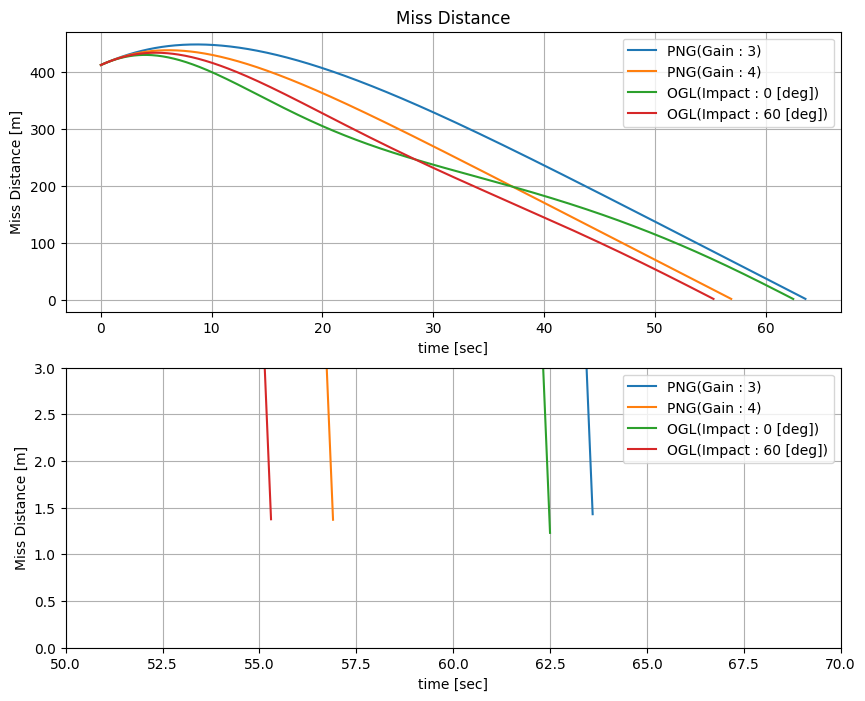

In [3]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(t_PNG3, Dist_PNG3, label = 'PNG(Gain : 3)')
plt.plot(t_PNG4, Dist_PNG4, label = 'PNG(Gain : 4)')
plt.plot(t_OGL_1, Dist_OGL_1, label = 'OGL(Impact : 0 [deg])')
plt.plot(t_OGL_2, Dist_OGL_2, label = 'OGL(Impact : 60 [deg])')
plt.xlabel('time [sec]')
plt.ylabel('Miss Distance [m]')
plt.title('Miss Distance')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(t_PNG3, Dist_PNG3, label = 'PNG(Gain : 3)')
plt.plot(t_PNG4, Dist_PNG4, label = 'PNG(Gain : 4)')
plt.plot(t_OGL_1, Dist_OGL_1, label = 'OGL(Impact : 0 [deg])')
plt.plot(t_OGL_2, Dist_OGL_2, label = 'OGL(Impact : 60 [deg])')
plt.xlabel('time [sec]')
plt.ylabel('Miss Distance [m]')
plt.xlim(50, 70)
plt.ylim(0, 3)
plt.legend()
plt.grid()
plt.show()